In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('seaborn')

In [2]:
mu = 100
background = stats.poisson.rvs(mu, loc=0, size=100000)

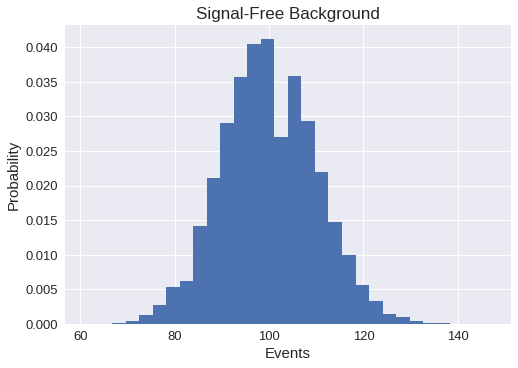

In [4]:
fig, ax = plt.subplots(1,1)
ax.hist(background, bins=30, density=True)
plt.xlabel("Events", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.title("Signal-Free Background", fontsize=17)
plt.tick_params(labelsize = 13)
plt.show()

### Problem 1

Where is the 5σ sensitivity threshold?

In [5]:
prob5sigma = stats.norm.cdf(5, loc=0, scale=1)
threshold_value = stats.poisson.ppf(prob5sigma, mu, loc=0)

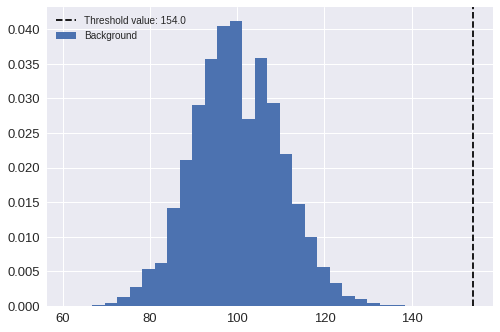

In [59]:
fig, ax = plt.subplots(1,1)
ax.hist(background, bins=30, density=True, label='Background')
plt.axvline(threshold_value, color='k', linestyle='--', label="Threshold value: "+str(threshold_value))
ax.legend(loc=0)
plt.tick_params(labelsize = 13)
plt.show()

### Problem 2

Now inject a signal (8-30σ range) of known strength into the background many times.

In [17]:
prob_signal = stats.norm.cdf(8, loc=0, scale=1)
val_signal = stats.poisson.ppf(prob_signal, mu)
print("The injected signal has a strength of "+str(val_signal)+" (8σ)")

The injected signal has a strength of 190.0 (8σ)


In [20]:
inject = np.zeros(100000)
for i in range(5000):
    inject[(np.random.randint(0, 100000))] = val_signal

**a) Histogram how bright the observed signal appears to be, and discuss it's shape.**

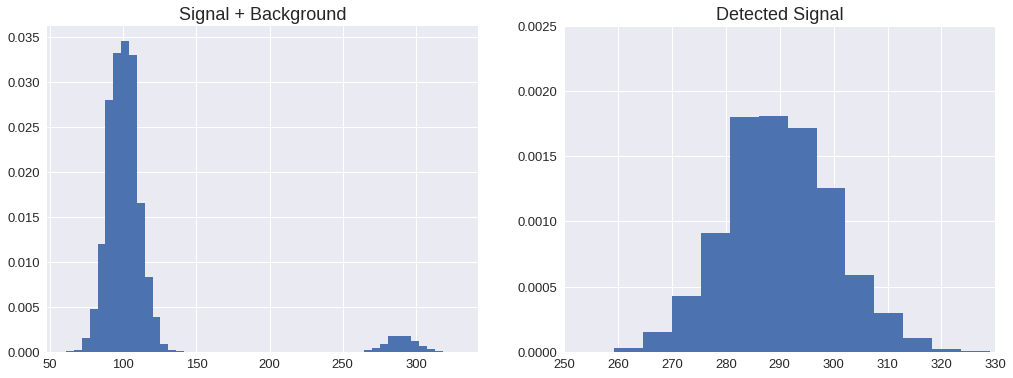

In [63]:
data = background + inject

fig, ax = plt.subplots(1,2, figsize=(17,6))
ax[0].hist(data, bins=50, density=True)
ax[0].set_title("Signal + Background", fontsize=18)
ax[0].tick_params(labelsize = 13)

ax[1].hist(data, bins=50, density=True)
ax[1].set_xlim([250, 330])
ax[1].set_ylim([0, 0.0025])
ax[1].set_title("Detected Signal", fontsize=18)
ax[1].tick_params(labelsize = 13)
plt.show()

Left plot: The original background can be seen in the stronger histogram, and the injected signal plus the background can be seen in the weaker histogram. The histogram of the signal shows the distribution of a random number of signals injected (added to the background). The background peaks at 100 and the injected signal has a value of 190; sometimes the background adds to the signal, creating values larger than 290, and sometimes it subtracts, creating smaller values.

Right plot: The same data with different bounds to better show the signal

**b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?**

The observed value is always stronger than the true injected signal. The distribution is modarately symmetric.

### Problem 3

Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

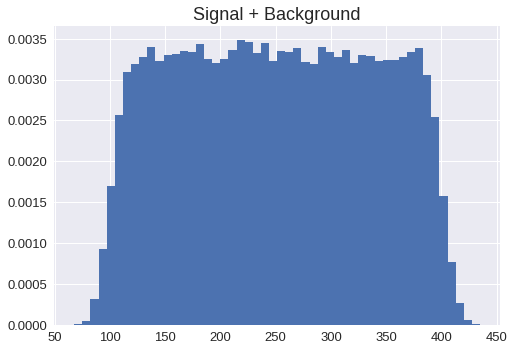

In [64]:
signal_strength = 302
signal_inject = stats.uniform.rvs(loc=0, scale=signal_strength, size=100000)

data = signal_inject + background

fig, ax = plt.subplots(1,1)
ax.hist(data, bins=50, density=True)
plt.title("Signal + Background", fontsize=18)
plt.tick_params(labelsize = 13)
plt.show()

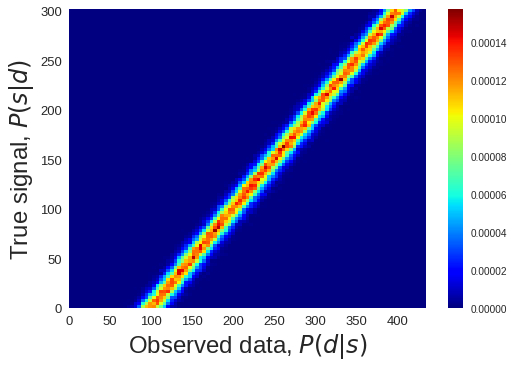

In [65]:
# set some values to avoid hardcoding
array_size = 100
data_max = round(np.sort(data)[-1])

# define bounds
signaledges = np.linspace(0, signal_strength, array_size) # y
dataedges = np.linspace(0, data_max, array_size) # x

# true signal
Psd, temp, temp2 = np.histogram2d(data, signal_inject, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters,signalcenters,Psd.T, cmap=plt.cm.jet, shading='auto')
plt.colorbar()
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.tick_params(labelsize = 13)
plt.show()

b) For the same injected signal power as in problem 2, show that you get the same answer.

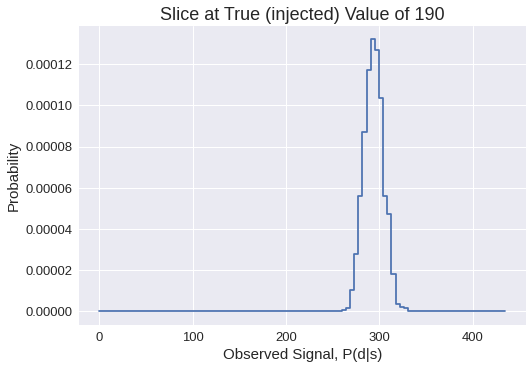

In [66]:
Pds = Psd.T

index = 63
no_bins = array_size / signal_strength
val = index/no_bins

x = np.linspace(dataedges[0], dataedges[-1], len(Pds[index]))
plt.step(x, Pds[index], where='mid')

plt.ylabel("Probability", fontsize=15)
plt.xlabel("Observed Signal, P(d|s)", fontsize=15)
plt.title("Slice at True (injected) Value of "+str(round(val)), fontsize=18)
plt.tick_params(labelsize = 13)
plt.show()

The signal has a lower probability but peaks at the same value (290).

**c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.**

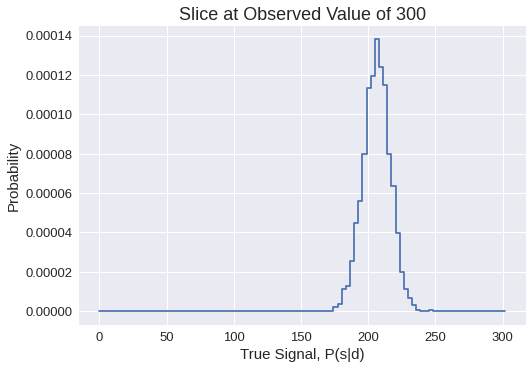

An observed value of 300 corresponds to a true signal with the above distribution that peaks at 206.47.


In [79]:
fig, ax = plt.subplots(1,1)

index = 69
no_bins = array_size / data_max
val = index/no_bins

x = np.linspace(signaledges[0], signaledges[-1], len(Psd[index]))
plt.step(x, Psd[index], where='mid')

plt.xlabel("True Signal, P(s|d)", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.title("Slice at Observed Value of "+str(round(val)), fontsize=18)
plt.tick_params(labelsize = 13)
plt.show()

avg_true_signal = x[np.where(Psd[index] == max(Psd[index]))][0]
print("An observed value of 300 corresponds to a true signal with the above distribution that peaks at "+str(round(avg_true_signal,2))+".")

This histogram shows the distribution of true signals for any observation. If you were to observe a value of 300, the true value of that measurement has a mean of 206.

**d) For your observed signal, what is the 1σ uncertainty on the true signal strength?**

In [97]:
# probability of 1 sigma uncertainty (34%)
prob1sigma = (stats.norm.cdf(1, loc=0, scale=1) - stats.norm.sf(1, loc=0, scale=1)) / 2

# maximum value of observed signal
peak_x_val = np.where(Psd[index] == max(Psd[index]))[0][0]

prob1sigma, peak_x_val

(0.3413447460685429, 67)

In [127]:
prob_sum = 0
for i in range(len(Psd[index]) - peak_x_val):
    prob_sum = prob_sum + Psd[index][peak_x_val+i]
    if prob_sum >= np.sum(Psd[index])*prob1sigma:
        sig1_x_val = peak_x_val+i
        pos_uncertainty = x[sig1_x_val] - avg_true_signal
        break
        
pos_uncertainty

6.16326530612244

In [126]:
prob_sum = 0
for i in range(len(Psd[index]) - peak_x_val):
    prob_sum = prob_sum + Psd[index][peak_x_val-i]
    if prob_sum >= np.sum(Psd[index])*prob1sigma:
        sig1_x_val = peak_x_val-i
        neg_uncertainty = x[sig1_x_val] - avg_true_signal
        break
        
neg_uncertainty

-6.16326530612244

The uncertainty of the measurement is 206.45$\pm$6.16

**e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?**

The observed value is always likely to be greater than the true injected signal (observed 300, true 206.45$\pm$6.16), so the measurement is biased. The uncertainty is symmetric, with 1 sigma values at 6.16 data points above and below the mean.